In [1]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290463 sha256=15b3e5937f1a94622dc3e63a14348e4ffa9b31bc0e77a2d532d311c122fc97a6
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee


In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && sudo make install
!pip install TA-Lib

URL transformed to HTTPS due to an HSTS policy
--2023-11-24 19:00:35--  https://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-24 19:00:35--  https://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Connecting to downloads.sourceforge.net (downloads.sourceforge.net)|204.68.111.105|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-24 19:00:37--  https://gigenet.dl.s

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import talib
import matplotlib.pyplot as plt

# BTCUSD verisini indirme
btc_data = yf.download('BTC-USD', start='2023-01-01', end='2023-10-01', interval='1d')

# Teknik göstergeleri hesaplama
btc_data['SMA_5'] = talib.SMA(btc_data['Close'], timeperiod=5)
btc_data['SMA_20'] = talib.SMA(btc_data['Close'], timeperiod=20)
btc_data['RSI'] = talib.RSI(btc_data['Close'])

# Eksik verileri doldurma
btc_data_filled = btc_data.fillna(method='ffill')
btc_data_filled.index = pd.to_datetime(btc_data_filled.index)

# Fiyat değişikliklerini kategorize etme fonksiyonu
def categorize_price_changes(data):
    data['Price_Change'] = data['Close'].pct_change() * 100
    data['Price_Change_Category'] = pd.cut(data['Price_Change'], bins=[-np.inf, -0.5, 0.5, np.inf], labels=['-1', '0', '1'])
    data['Price_Change_Category'].fillna('0', inplace=True)
    data.drop('Price_Change', axis=1, inplace=True)  # Price_Change sütununu kaldır
    return data

# Fiyat değişikliklerini kategorize etme işlemi
btc_data_filled = categorize_price_changes(btc_data_filled)

[*********************100%%**********************]  1 of 1 completed


In [4]:
btc_data_filled

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_20,RSI,Price_Change_Category
Date,,,,,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN,NaN,NaN,0
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,NaN,NaN,NaN,0
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,NaN,NaN,NaN,0
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,NaN,NaN,NaN,1
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,16738.676563,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2023-09-26,26294.757812,26389.884766,26090.712891,26217.250000,26217.250000,9985498161,26386.303125,26347.273340,45.020912,0
2023-09-27,26209.498047,26817.841797,26111.464844,26352.716797,26352.716797,11718380997,26340.932812,26352.899414,47.410288,1
2023-09-28,26355.812500,27259.500000,26327.322266,27021.546875,27021.546875,14079002707,26429.364063,26408.694043,57.281502,1


In [5]:

# Eğer eksik veri varsa, bu verileri doldurabilir ya da silebiliriz.
# Örnek olarak eksik değerleri önceki ya da sonraki değerlerle dolduralım
btc_data_filled = btc_data.fillna(method='ffill')  # Önceki değerlerle doldur

# Tarih saat formatını uygun hale getirme
btc_data_filled.index = pd.to_datetime(btc_data_filled.index)

# Özellik mühendisliği için bazı temel istatistikler
btc_data_filled['Close'].describe()

count      273.000000
mean     26353.213248
std       3306.577843
min      16625.080078
25%      24375.960938
50%      26868.353516
75%      29042.126953
max      31476.048828
Name: Close, dtype: float64

In [6]:
btc_data

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_20,RSI
Date,,,,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN,NaN,NaN
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,NaN,NaN,NaN
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,NaN,NaN,NaN
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,NaN,NaN,NaN
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,16738.676563,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-09-26,26294.757812,26389.884766,26090.712891,26217.250000,26217.250000,9985498161,26386.303125,26347.273340,45.020912
2023-09-27,26209.498047,26817.841797,26111.464844,26352.716797,26352.716797,11718380997,26340.932812,26352.899414,47.410288
2023-09-28,26355.812500,27259.500000,26327.322266,27021.546875,27021.546875,14079002707,26429.364063,26408.694043,57.281502


In [7]:
btc_data_filled['RSI'] = talib.RSI(btc_data_filled['Close'])
btc_data_filled['Daily_Return'] = btc_data_filled['Close'].pct_change()  # Günlük getiriler

# Price_Change_Category eklemek
btc_data_filled['Price_Change_Category'] = pd.cut(btc_data_filled['Close'].diff(), bins=[-np.inf, -0.5, 0.5, np.inf], labels=['-1', '0', '1'])
btc_data_filled['Price_Change_Category'].fillna('0', inplace=True)

In [8]:
btc_data_filled.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_5,SMA_20,RSI,Daily_Return,Price_Change_Category
Date,,,,,,,,,,,
2023-09-26,26294.757812,26389.884766,26090.712891,26217.250000,26217.250000,9985498161,26386.303125,26347.273340,45.020912,-0.003089,-1
2023-09-27,26209.498047,26817.841797,26111.464844,26352.716797,26352.716797,11718380997,26340.932812,26352.899414,47.410288,0.005167,1
2023-09-28,26355.812500,27259.500000,26327.322266,27021.546875,27021.546875,14079002707,26429.364063,26408.694043,57.281502,0.025380,1
2023-09-29,27024.841797,27225.937500,26721.763672,26911.720703,26911.720703,10396435377,26560.342969,26459.496191,55.441249,-0.004064,-1
2023-09-30,26911.689453,27091.794922,26888.968750,26967.916016,26967.916016,5331172801,26694.230078,26516.280664,56.216342,0.002088,1


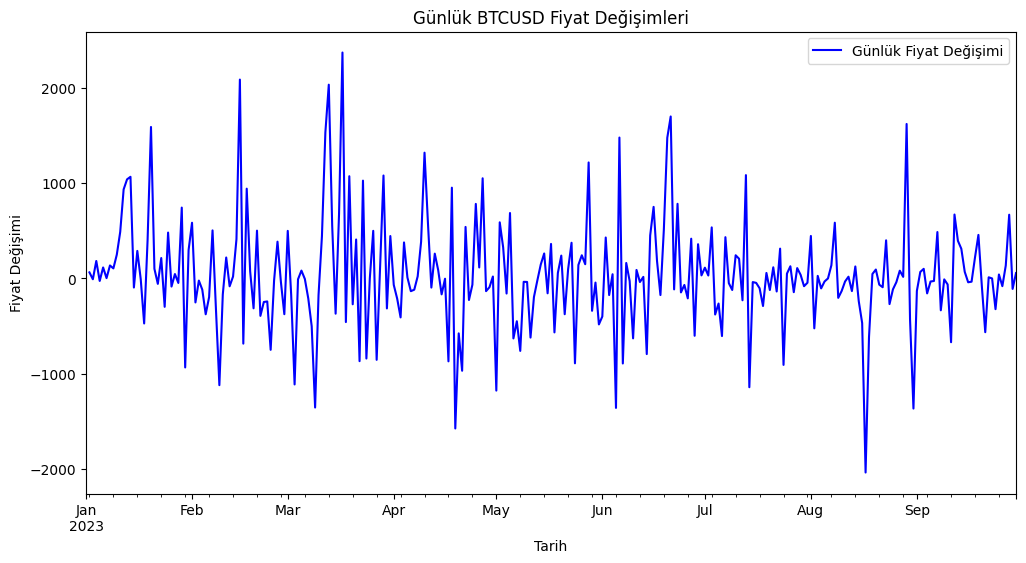

In [9]:
# Fiyat değişimlerini gösteren grafik
plt.figure(figsize=(12, 6))
btc_data_filled['Close'].diff().plot(label='Günlük Fiyat Değişimi', color='blue')
plt.title('Günlük BTCUSD Fiyat Değişimleri')
plt.xlabel('Tarih')
plt.ylabel('Fiyat Değişimi')
plt.legend()
plt.show()

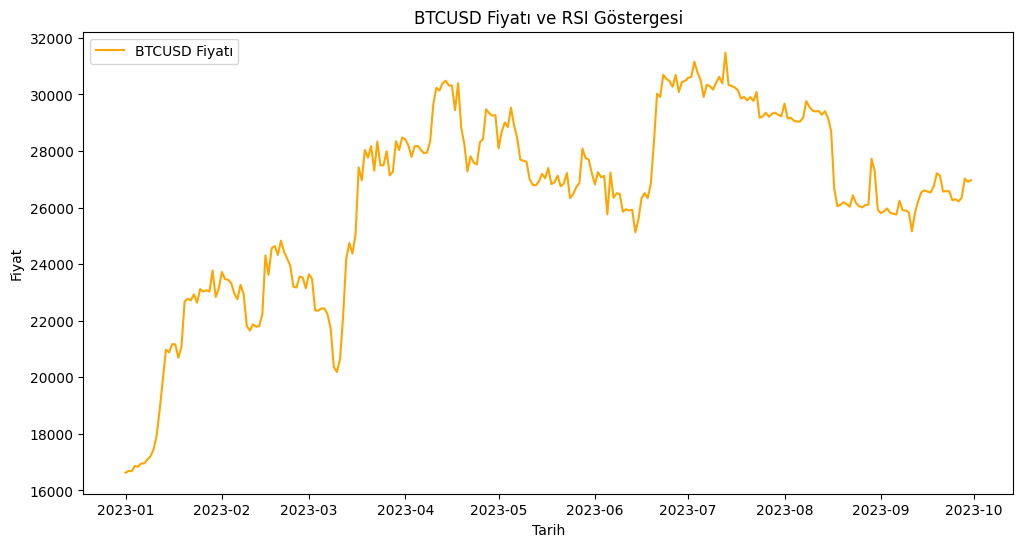

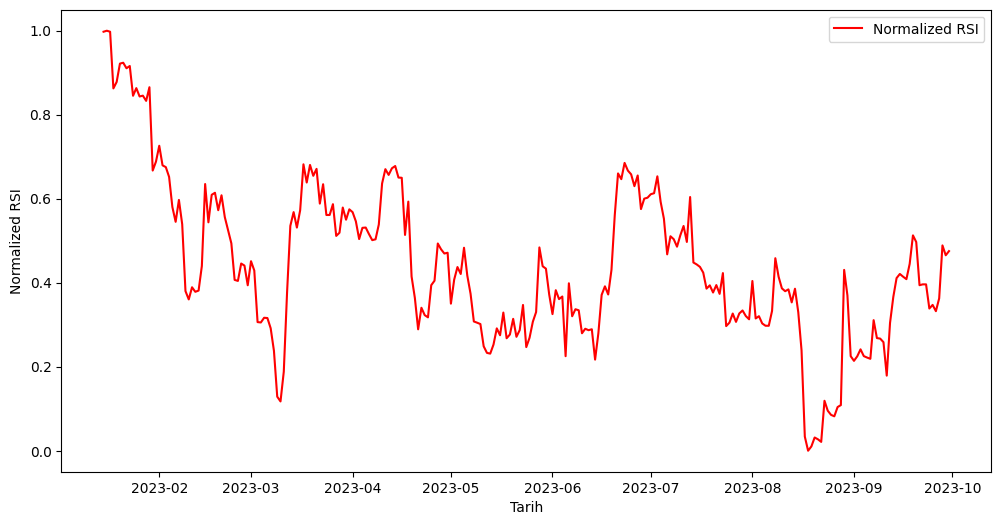

In [10]:
# RSI değerlerini normalize ederek görselleştirme
normalized_rsi = (btc_data_filled['RSI'] - btc_data_filled['RSI'].min()) / (
    btc_data_filled['RSI'].max() - btc_data_filled['RSI'].min())
plt.figure(figsize=(12, 6))
plt.plot(btc_data_filled.index, btc_data_filled['Close'], label='BTCUSD Fiyatı', color='orange')
plt.title('BTCUSD Fiyatı ve RSI Göstergesi')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend(loc='upper left')

plt.figure(figsize=(12, 6))
plt.plot(normalized_rsi.index, normalized_rsi, label='Normalized RSI', color='red')
plt.legend(loc='upper right')
plt.xlabel('Tarih')
plt.ylabel('Normalized RSI')
plt.show()

In [11]:
# RSI'nin altına eklendi
btc_data_filled.isnull().sum()
btc_data_filled = btc_data.fillna(method='ffill')  # Önceki değerlerle doldur

In [12]:
btc_data_filled['SMA_5_Category'] = pd.cut(btc_data_filled['SMA_5'], bins=5)
btc_data_filled['SMA_5_Category'] = btc_data_filled['SMA_5_Category'].cat.codes

In [13]:
btc_data_filled['Trend'] = np.where(btc_data_filled['Close'].shift(-1) > btc_data_filled['Close'], 1, 0)

In [14]:
X = btc_data_filled[['Volume', 'Close', 'SMA_5_Category', 'SMA_20']]
y = btc_data_filled['Trend']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,shuffle=True, test_size=0.4)

In [16]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# LightGBM modeli oluşturma ve eğitme
lgbm_model = LGBMClassifier(random_state=16)
lgbm_model.fit(X_train, y_train)

# Eğitilmiş model ile tahmin yapma
y_pred_lgbm = lgbm_model.predict(X_test)

# Doğruluk değeri
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("LightGBM Accuracy:", accuracy_lgbm)

LightGBM Accuracy: 0.5


/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


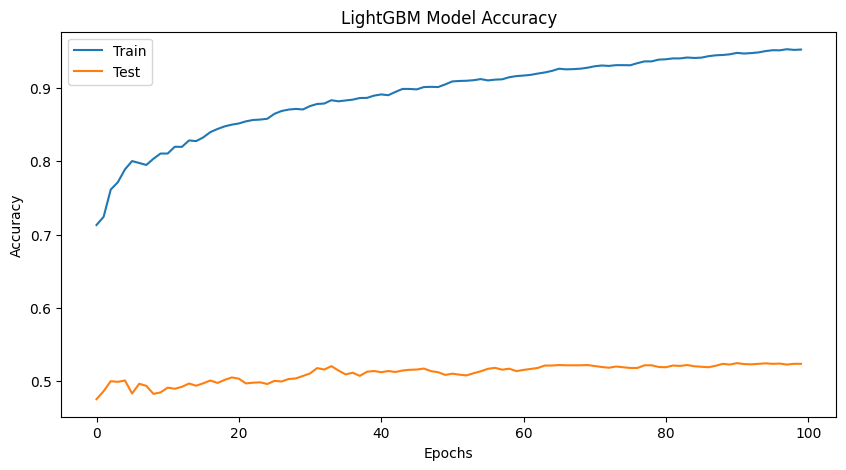

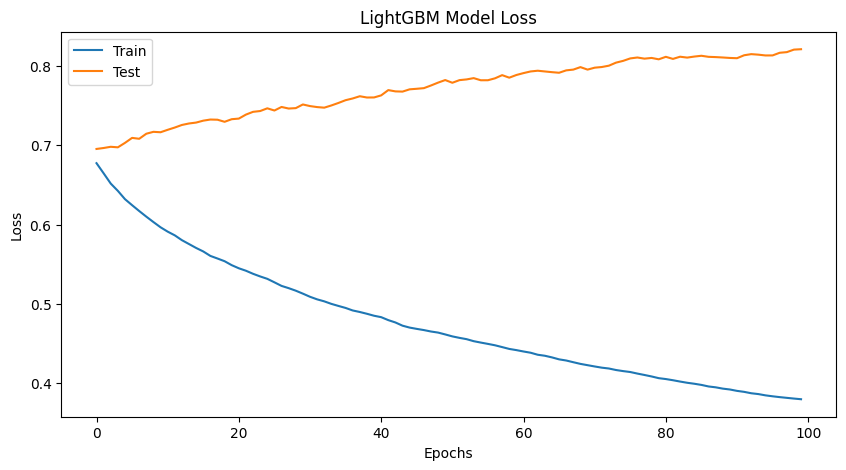

In [17]:
# LightGBM modeli için accuracy ve loss değerlerini kaydetme
lgbm_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric=['auc', 'binary_logloss'], verbose=False)

lgbm_results = lgbm_model.evals_result_
lgbm_epochs = len(lgbm_results['training']['auc'])
lgbm_x_axis = range(0, lgbm_epochs)

# Accuracy grafiği
plt.figure(figsize=(10, 5))
plt.plot(lgbm_x_axis, lgbm_results['training']['auc'], label='Train')
plt.plot(lgbm_x_axis, lgbm_results['valid_1']['auc'], label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('LightGBM Model Accuracy')
plt.show()

# Loss grafiği
plt.figure(figsize=(10, 5))
plt.plot(lgbm_x_axis, lgbm_results['training']['binary_logloss'], label='Train')
plt.plot(lgbm_x_axis, lgbm_results['valid_1']['binary_logloss'], label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('LightGBM Model Loss')
plt.show()

# **Farklı veriler kullanarak elde ettiğim sonuçlar**
    
    BTC LightGBM Accuracy: 0.5
    APPLE LightGBM Accuracy: 0.5466666666666666
    AMZN LightGBM Accuracy: 0.52
    TSLA LightGBM Accuracy: 0.5466666666666666
    EURUSD=X LightGBM Accuracy: 0.5512820512820513